In [57]:
from vectors import vector_mean, square_distance, distance
import random
import numpy as np
import matplotlib.pyplot as plt

## KMeans

In [58]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = None

    def classify(self,input):
        return min(range(self.k),key=lambda i: square_distance(input, self.means[i]))
    
    def train(self,inputs):
        self.means = random.sample(inputs, self.k)
        assignments = None

        while True:
            #new_assignments = [self.classify(input) for input in inputs]
            new_assignments = map(self.classify,inputs)

            if assignments != new_assignments:
                return 
            
            assignments = new_assignments

            for i in range(self.k):
                i_points = [p for p,a in zip(inputs,assignments) if a == i]

                if i_points:
                    self.means[i] = vector_mean(i_points)


/tmp/ipykernel_14163/2177873521.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)


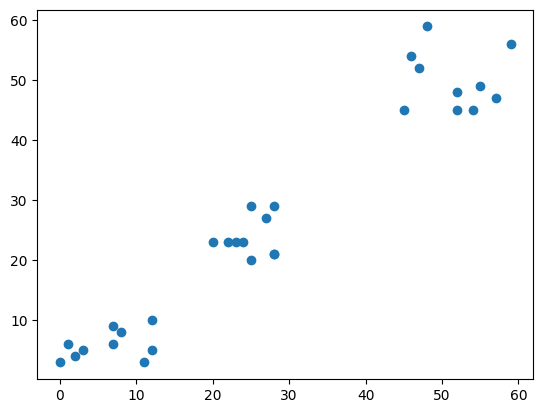

In [59]:
np.random.seed(0)

A = np.random.randint(0,15,(10,2))
B = np.random.randint(20,30,(10,2))
C = np.random.randint(45,60,(10,2))

# dar merge no três vetores

cord = np.concatenate((A,B,C))

# plot scatter
fig, ax = plt.subplots()

ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)

plt.show()


/tmp/ipykernel_14163/315190686.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)
/tmp/ipykernel_14163/315190686.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(means[:,0], means[:,1],  c='tab:red', vmin=0, vmax=100)


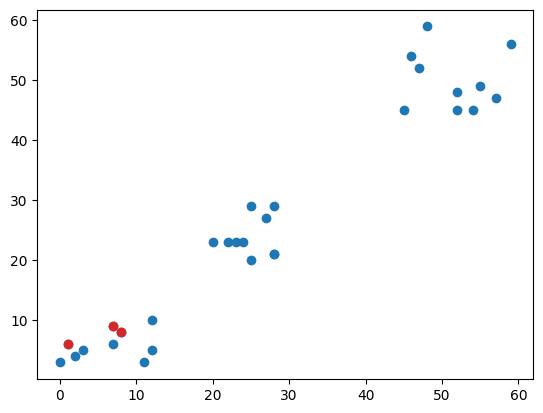

In [60]:
random.seed(4)

clusterer = KMeans(3)

clusterer.train(list(cord))

means = np.array(clusterer.means)

fig, ax = plt.subplots()

ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)
ax.scatter(means[:,0], means[:,1],  c='tab:red', vmin=0, vmax=100)

plt.show()


/tmp/ipykernel_14163/1964969936.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)
/tmp/ipykernel_14163/1964969936.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(means[:,0], means[:,1],  c='tab:red', vmin=0, vmax=100)


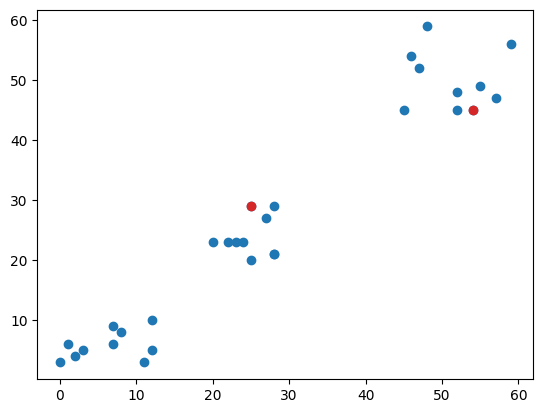

In [61]:
clusterer = KMeans(2)

clusterer.train(list(cord))

means = np.array(clusterer.means)

fig, ax = plt.subplots()

ax.scatter(cord[:,0], cord[:,1],  vmin=0, vmax=100)
ax.scatter(means[:,0], means[:,1],  c='tab:red', vmin=0, vmax=100)

plt.show()


In [62]:
def squared_clustering_errors(inputs,k):
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)

    return sum(square_distance(input, means[cluster]) for input, cluster in zip(inputs,assignments))

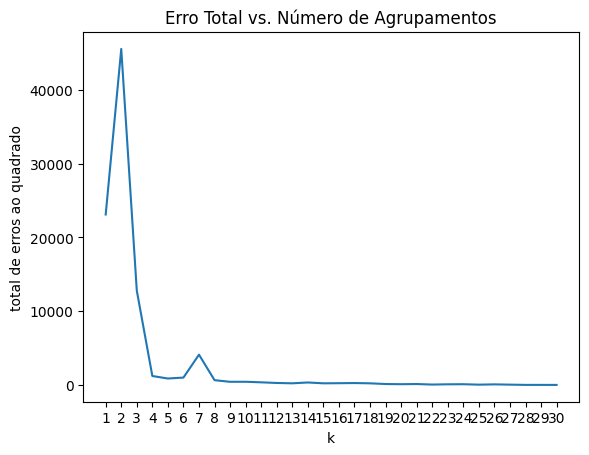

In [63]:
ks = range(1, len(cord) + 1)
errors = [squared_clustering_errors(list(cord), k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total de erros ao quadrado")
plt.title("Erro Total vs. Número de Agrupamentos")
plt.show()

## Agrupamente  hierarquico. 

In [ ]:
def is_leaf(cluster):
    return len(cluster) == 1

def get_children(cluster):
    if is_leaf(cluster):
        raise TypeError("Agrupamente folha não tem filhos")
    else:
        return cluster[1]
    
def get_values(cluster):
    if is_leaf(cluster):
        return cluster
    else:
        return [value for child in get_children(cluster) for value in get_values(child)]
    
def cluster_distance(cluster1,cluster2, distance_agg=min):
    return distance_agg([distance(input1,input2) for input1 in get_values(cluster1) for input2 in get_values(cluster2)])

def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf')
    else:
        return cluster[0]
    
def bottom_up_cluster(inputs, distance_agg=min):
    clusters = [(input,) for input in inputs]

    while len(clusters) > 1:
        c1,c2 = min([(cluster1,cluster2) for i, cluster1 in enumerate(clusters) for cluster2 in clusters[:i]],
                    key= lambda T: cluster_distance(T[0],T[1], distance_agg))
        
        clusters = [c for c in clusters if c != c1 and c != c2]

        merged_cluster = (len(clusters),[c1,c2])
        
        clusters.append(merged_cluster)

    return clusters[0]



